In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

# Calculate the date 1 year ago from the last data point in the database

measurements = Base.classes.measurement 

session.query(measurements.date).order_by(measurements.date.desc()).first()

# Perform a query to retrieve the data and precipitation scores

prcpyear = session.query(measurements.date, measurements.prcp).\
    filter(func.strftime('%Y-%m-%d', measurements.date) > '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcpdf = pd.DataFrame(prcpyear, columns=['date', 'prcp'])
prcpdfdate = prcpdf.set_index('date')

# Sort the dataframe by date
prcpdf.sort_values('date').head()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


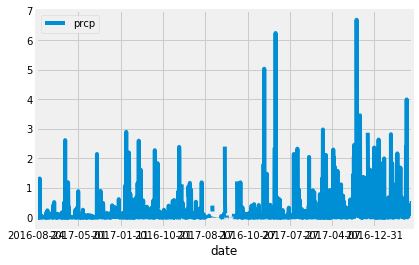

In [12]:
#plt.plot(prcpdf['date'], prcpdf['prcp'])
#plt.title("Precipitation in Hawaii")
#plt.ylabel('Precipitation')
#plt.xlabel('Date')
#plt.legend(['Precipitation'])
#plt.show()

prcpdfdate.plot()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpdf.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset?

scolumns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
station = Base.classes.station
session.query(station.station).count()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = session.query(measurements.station, func.count(measurements.station)).\
    group_by(measurements.station).\
    order_by(func.count(measurements.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
funcs = [func.min(measurements.tobs), 
    func.max(measurements.tobs), 
    func.avg(measurements.tobs)]
maxstation = session.query(*funcs).\
    filter(measurements.station == "USC00519281").all()
maxstation

[(54.0, 85.0, 71.66378066378067)]

In [33]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highstation = session.query(measurements.tobs).\
        filter(measurements.station == "USC00519281", \
        func.strftime('%Y-%m-%d', measurements.date) > '2016-08-23').all()

tobsdf = pd.DataFrame(highstation, columns=['tobs'])
tobsdf.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


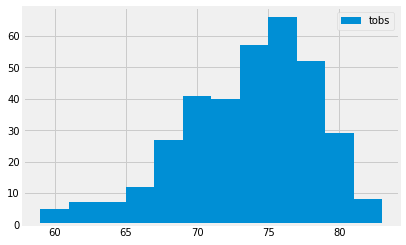

In [36]:
plt.hist(tobsdf['tobs'], bins=12)
plt.legend(['tobs'])